In [1]:
import nibabel as nib 
import nilearn.plotting as niplt 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

In [10]:
d="/jukebox/griffiths/bert-brains/"
#mask=nib.load(d+"21styear_data/whole_brain_mask.nii.gz").get_fdata().astype('bool')
def get_result_combined(result_dir):
    nii=nib.load(result_dir+"two_story_combined_mean.nii.gz")
    affine=nii.affine
    result_volume=nii.get_fdata()
    return result_volume 

black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
 'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-296', 'sub-127', 'sub-279', 
 'sub-315', 'sub-314']
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']

def get_result_dataset(result_dir):
    print(result_dir)
    if 'slumlordreach' in result_dir:
        subs=slumlordreach_subs
    else:
        subs=black_subs
    
    result_volume=np.mean([nib.load(result_dir+sub+"_parcels_encoding.nii.gz").get_fdata() for sub in subs],axis=0)
    affine=nib.load(result_dir+subs[0]+"_parcels_encoding.nii.gz").affine 
    return result_volume

In [34]:
def get_individual_story_preference_map(story):
    layer_names=['layer_'+str(i)+"_activations" for i in range(0,13)] 
    save_prefix=d+"results/"+story+"/"
    save_dirs=[save_prefix+"encoding-"+layer+"/" for layer in layer_names]

    mean_volume=np.argmax(np.asarray([get_result_dataset(d) for d in save_dirs]),axis=0)
    p_value_volumes=np.asarray([nib.load(d+"individual_bootstrap_pvalue_parcellation.nii.gz").get_fdata() for d in save_dirs])
    p_volume=np.zeros(mean_volume.shape)
    for i in range(p_volume.shape[0]):
        #print(i,p_volume.shape[0])
        for j in range(p_volume.shape[1]):
            for k in range(p_volume.shape[2]):
                p_volume[i,j,k]=p_value_volumes[mean_volume[i,j,k],i,j,k]
    parcellation=nib.load('/jukebox/griffiths/bert-brains/'+story+"_data/Schaefer1000_3mm.nii.gz")
    affine=parcellation.affine 
    mean_volume[parcellation.get_fdata()>0]+=1
    return mean_volume,p_volume,affine 


def get_combined_story_preference_map():
    layer_names=['layer_'+str(i)+"_activations" for i in range(0,13)] 
    save_prefix=d+"results/slumlordreach/"
    save_dirs=[save_prefix+"encoding-"+layer+"/" for layer in layer_names]

    mean_volume=np.argmax(np.asarray([get_result_combined(d) for d in save_dirs]),axis=0)
    p_value_volumes=np.asarray([nib.load(d+"individual_bootstrap_pvalue_parcellation.nii.gz").get_fdata() for d in save_dirs])
    p_volume=np.zeros(mean_volume.shape)
    for i in range(p_volume.shape[0]):
        #print(i,p_volume.shape[0])
        for j in range(p_volume.shape[1]):
            for k in range(p_volume.shape[2]):
                p_volume[i,j,k]=p_value_volumes[mean_volume[i,j,k],i,j,k]
    parcellation=nib.load("/jukebox/griffiths/bert-brains/slumlordreach_data/Schaefer1000_3mm.nii.gz")
    affine=parcellation.affine 
    mean_volume[parcellation.get_fdata()>0]+=1
    return mean_volume,p_volume,affine 




/jukebox/griffiths/bert-brains/results/black/encoding-layer_0_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_1_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_2_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_3_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_4_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_5_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_6_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_7_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_8_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_9_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_10_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_11_activations/
/jukebox/griffiths/bert-brains/results/black/encoding-layer_12_activations/


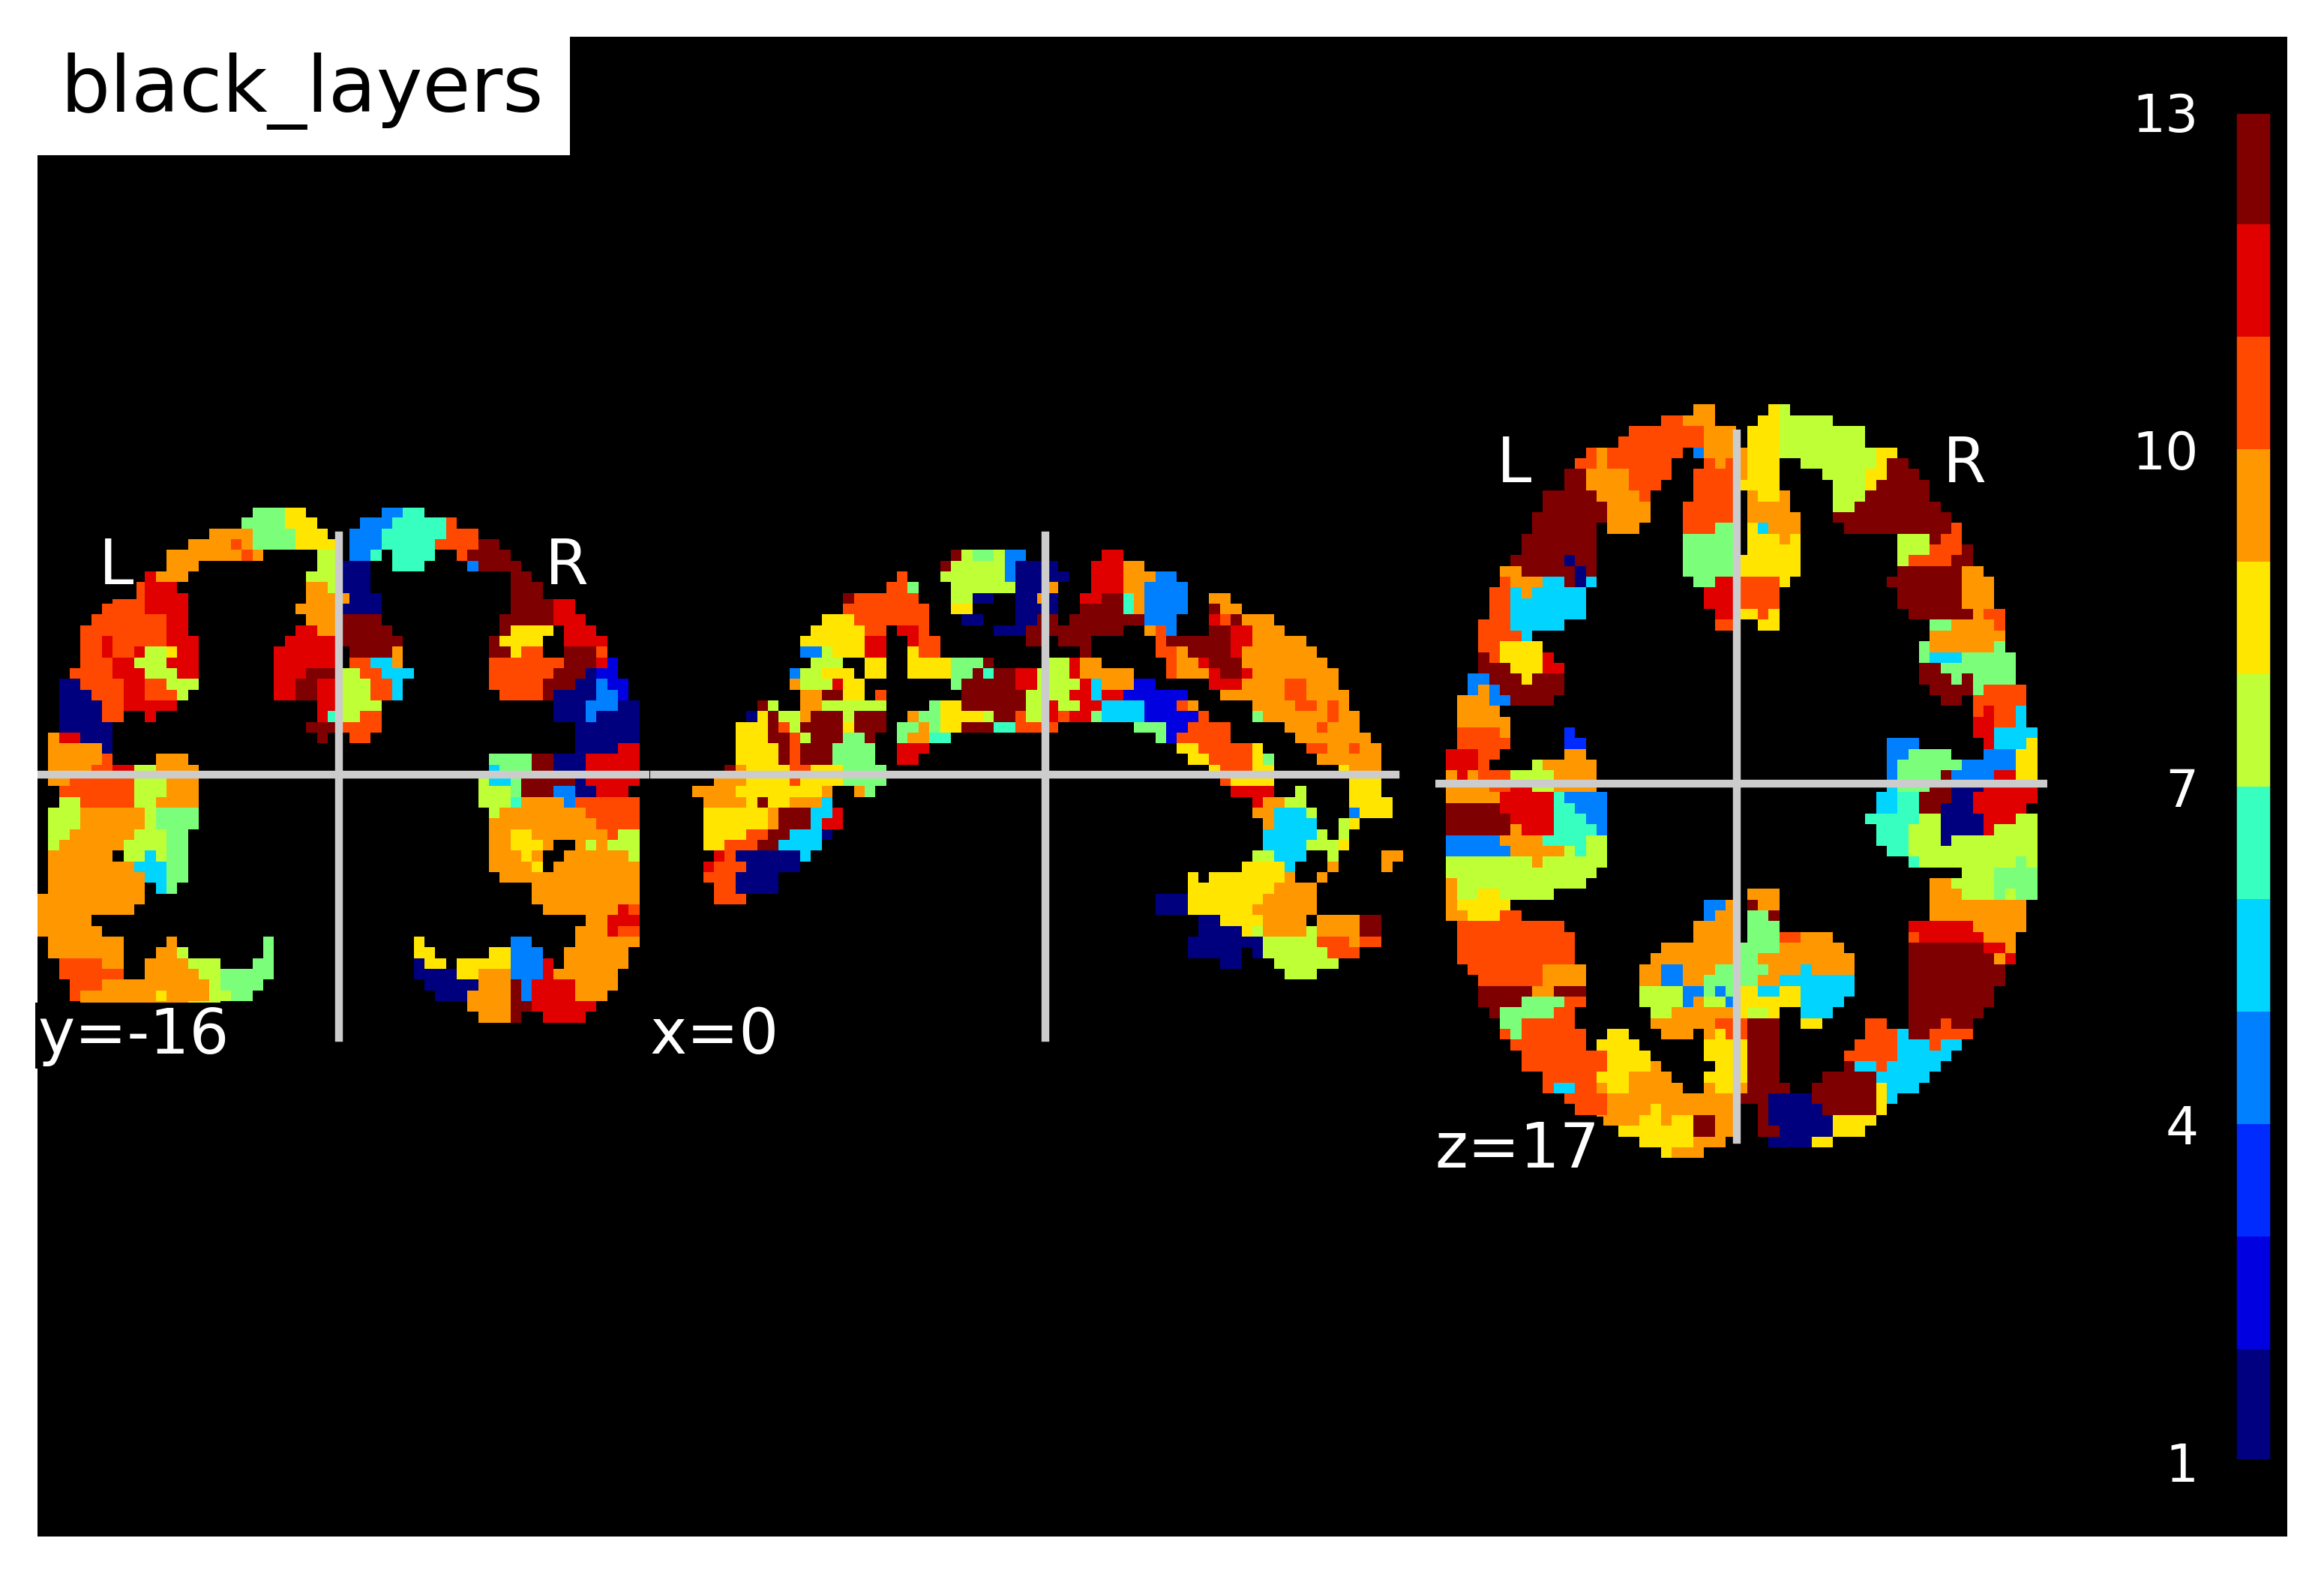

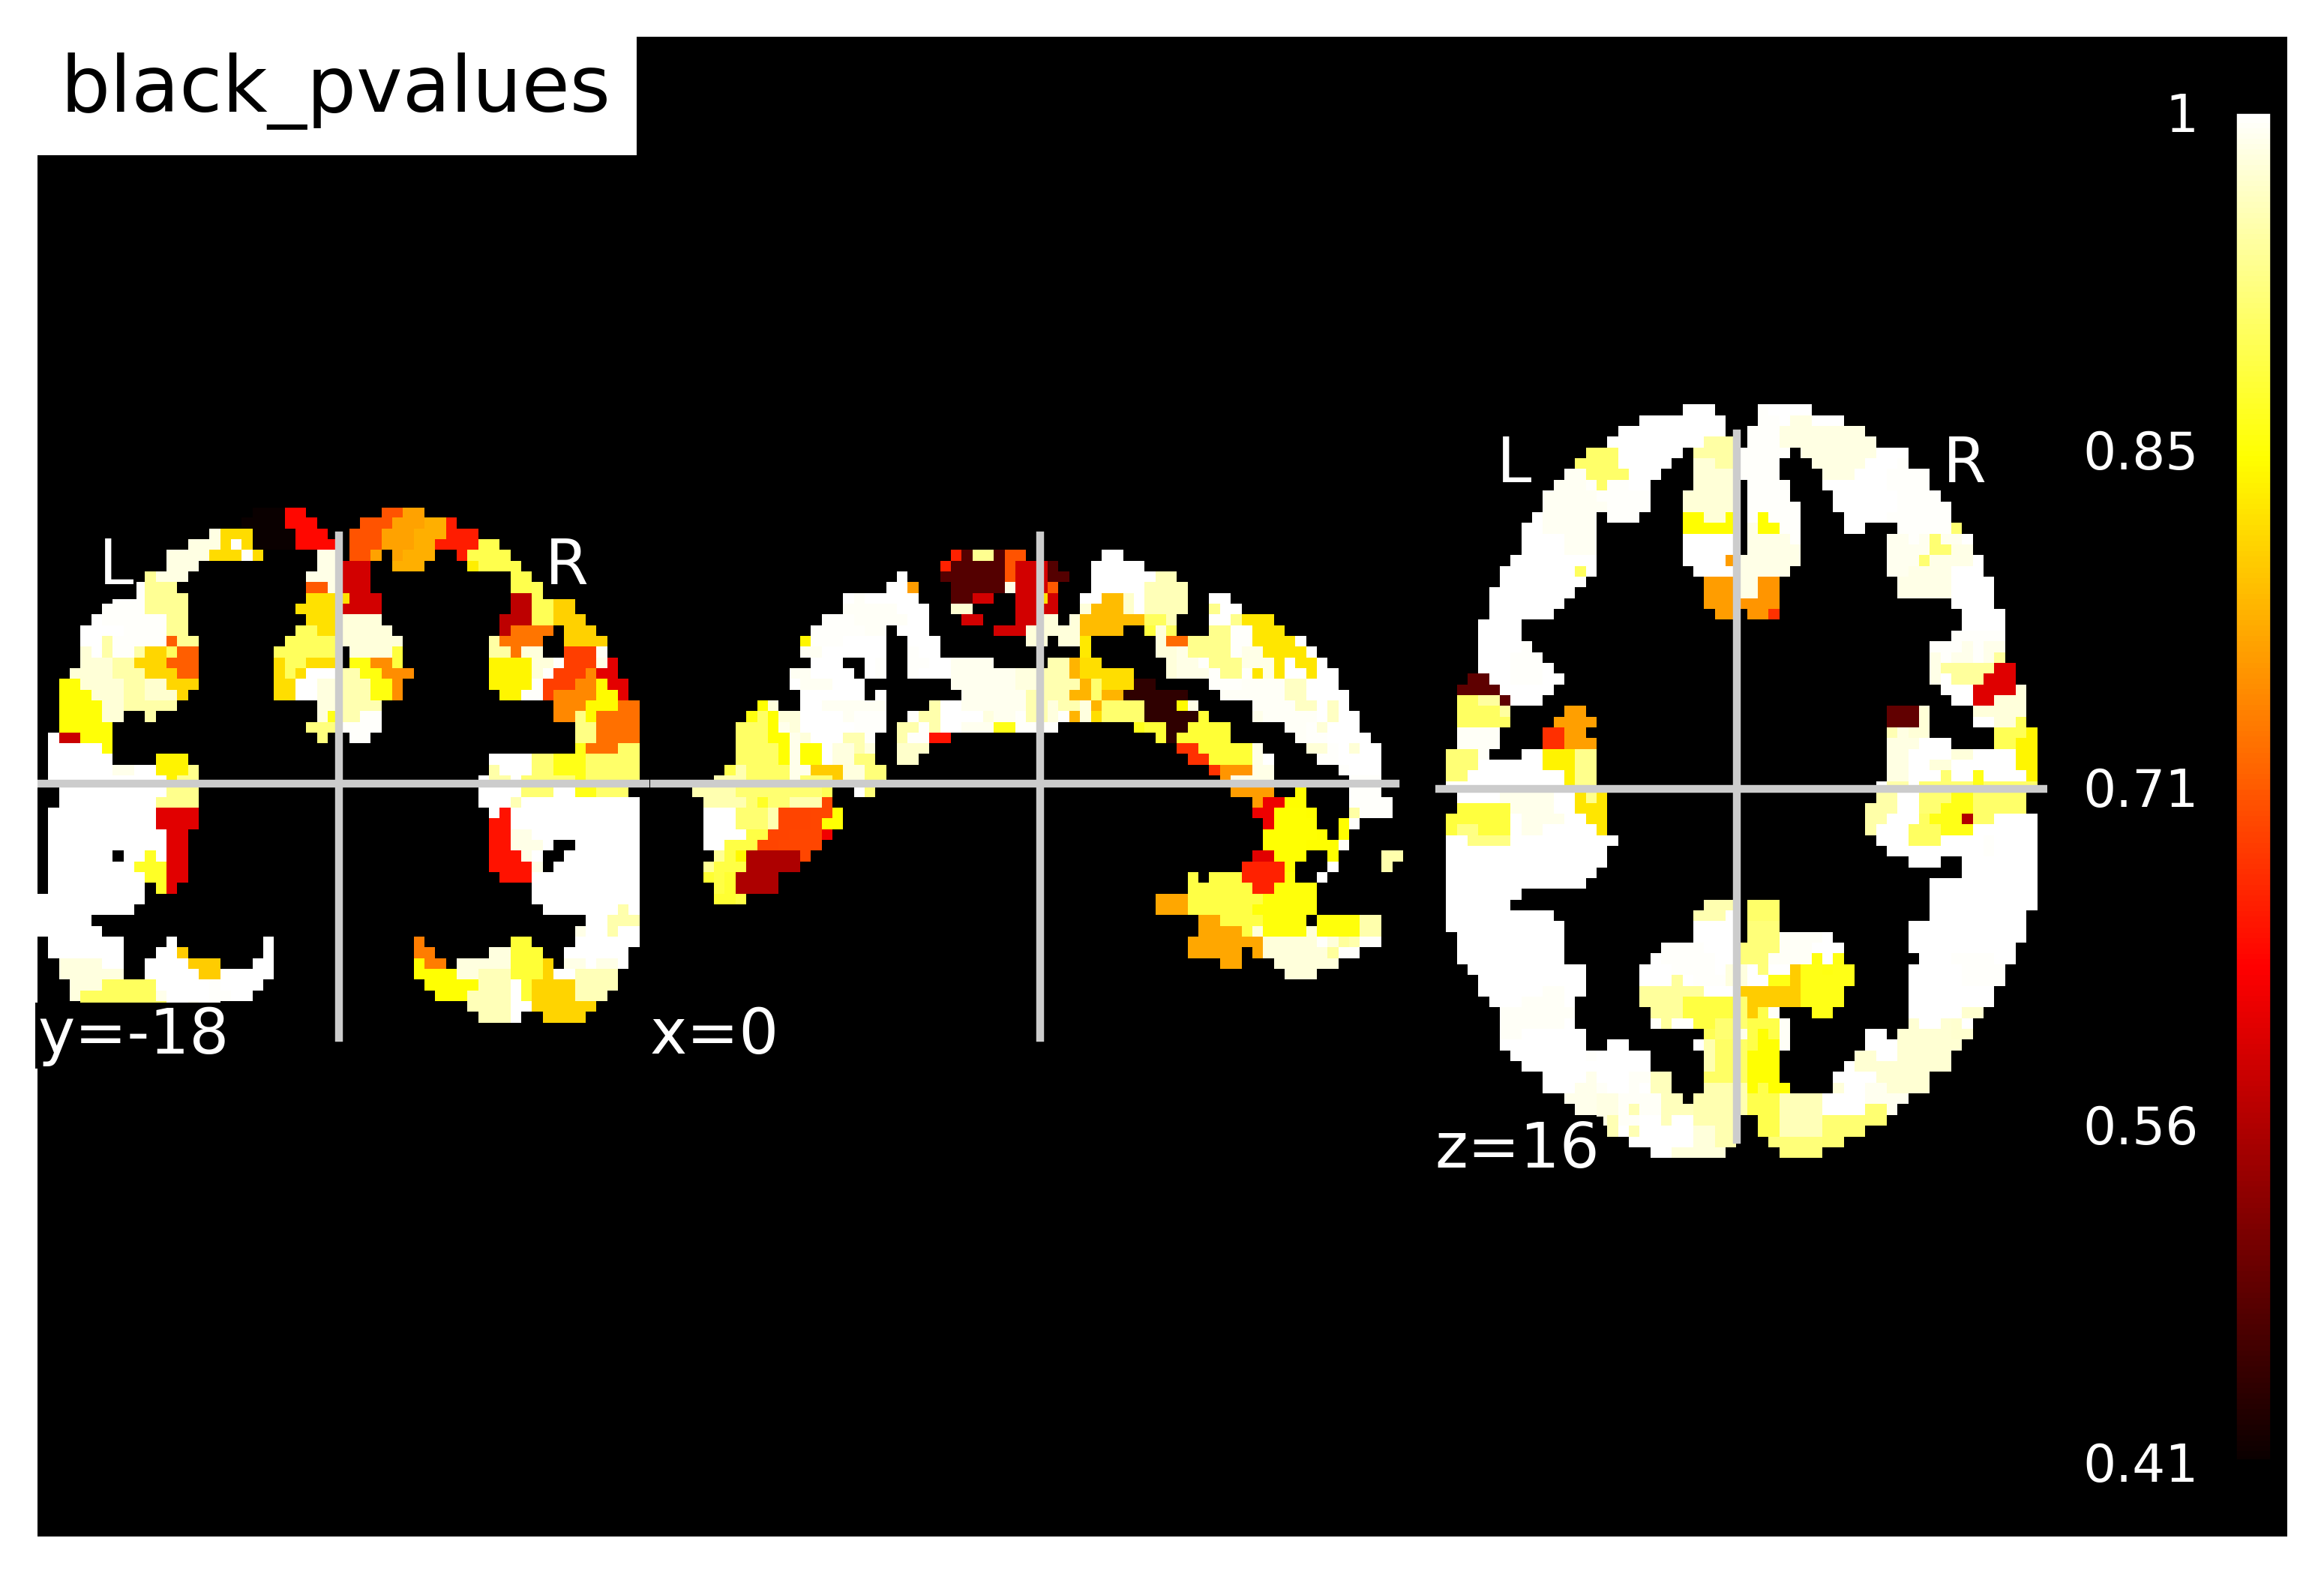

In [25]:
from pylab import *
#Individual Black Preference Map 
m,p,affine=get_individual_story_preference_map('black')
fig=plt.figure(dpi=500)
x=niplt.plot_img(nib.Nifti1Image(m,affine),cmap = cm.get_cmap('jet', 13),figure=fig,colorbar=True,threshold=0.9,vmax=13,black_bg=True,title='black_layers')
fig=plt.figure(dpi=500)
x=niplt.plot_img(nib.Nifti1Image(p,affine),figure=fig,colorbar=True,black_bg=True,cut_coords=(0,-18,16),threshold=1e-9,cmap='hot',title='black_pvalues')
#cbar=fig.colorbar(x)



/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_0_activations/
/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_1_activations/
/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_2_activations/
/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_3_activations/
/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_4_activations/
/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_5_activations/
/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_6_activations/
/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_7_activations/
/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_8_activations/
/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_9_activations/
/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_10_activations/
/jukebox/griffiths/bert-brains/results/slumlordreach/encoding-layer_11_activations/
/j

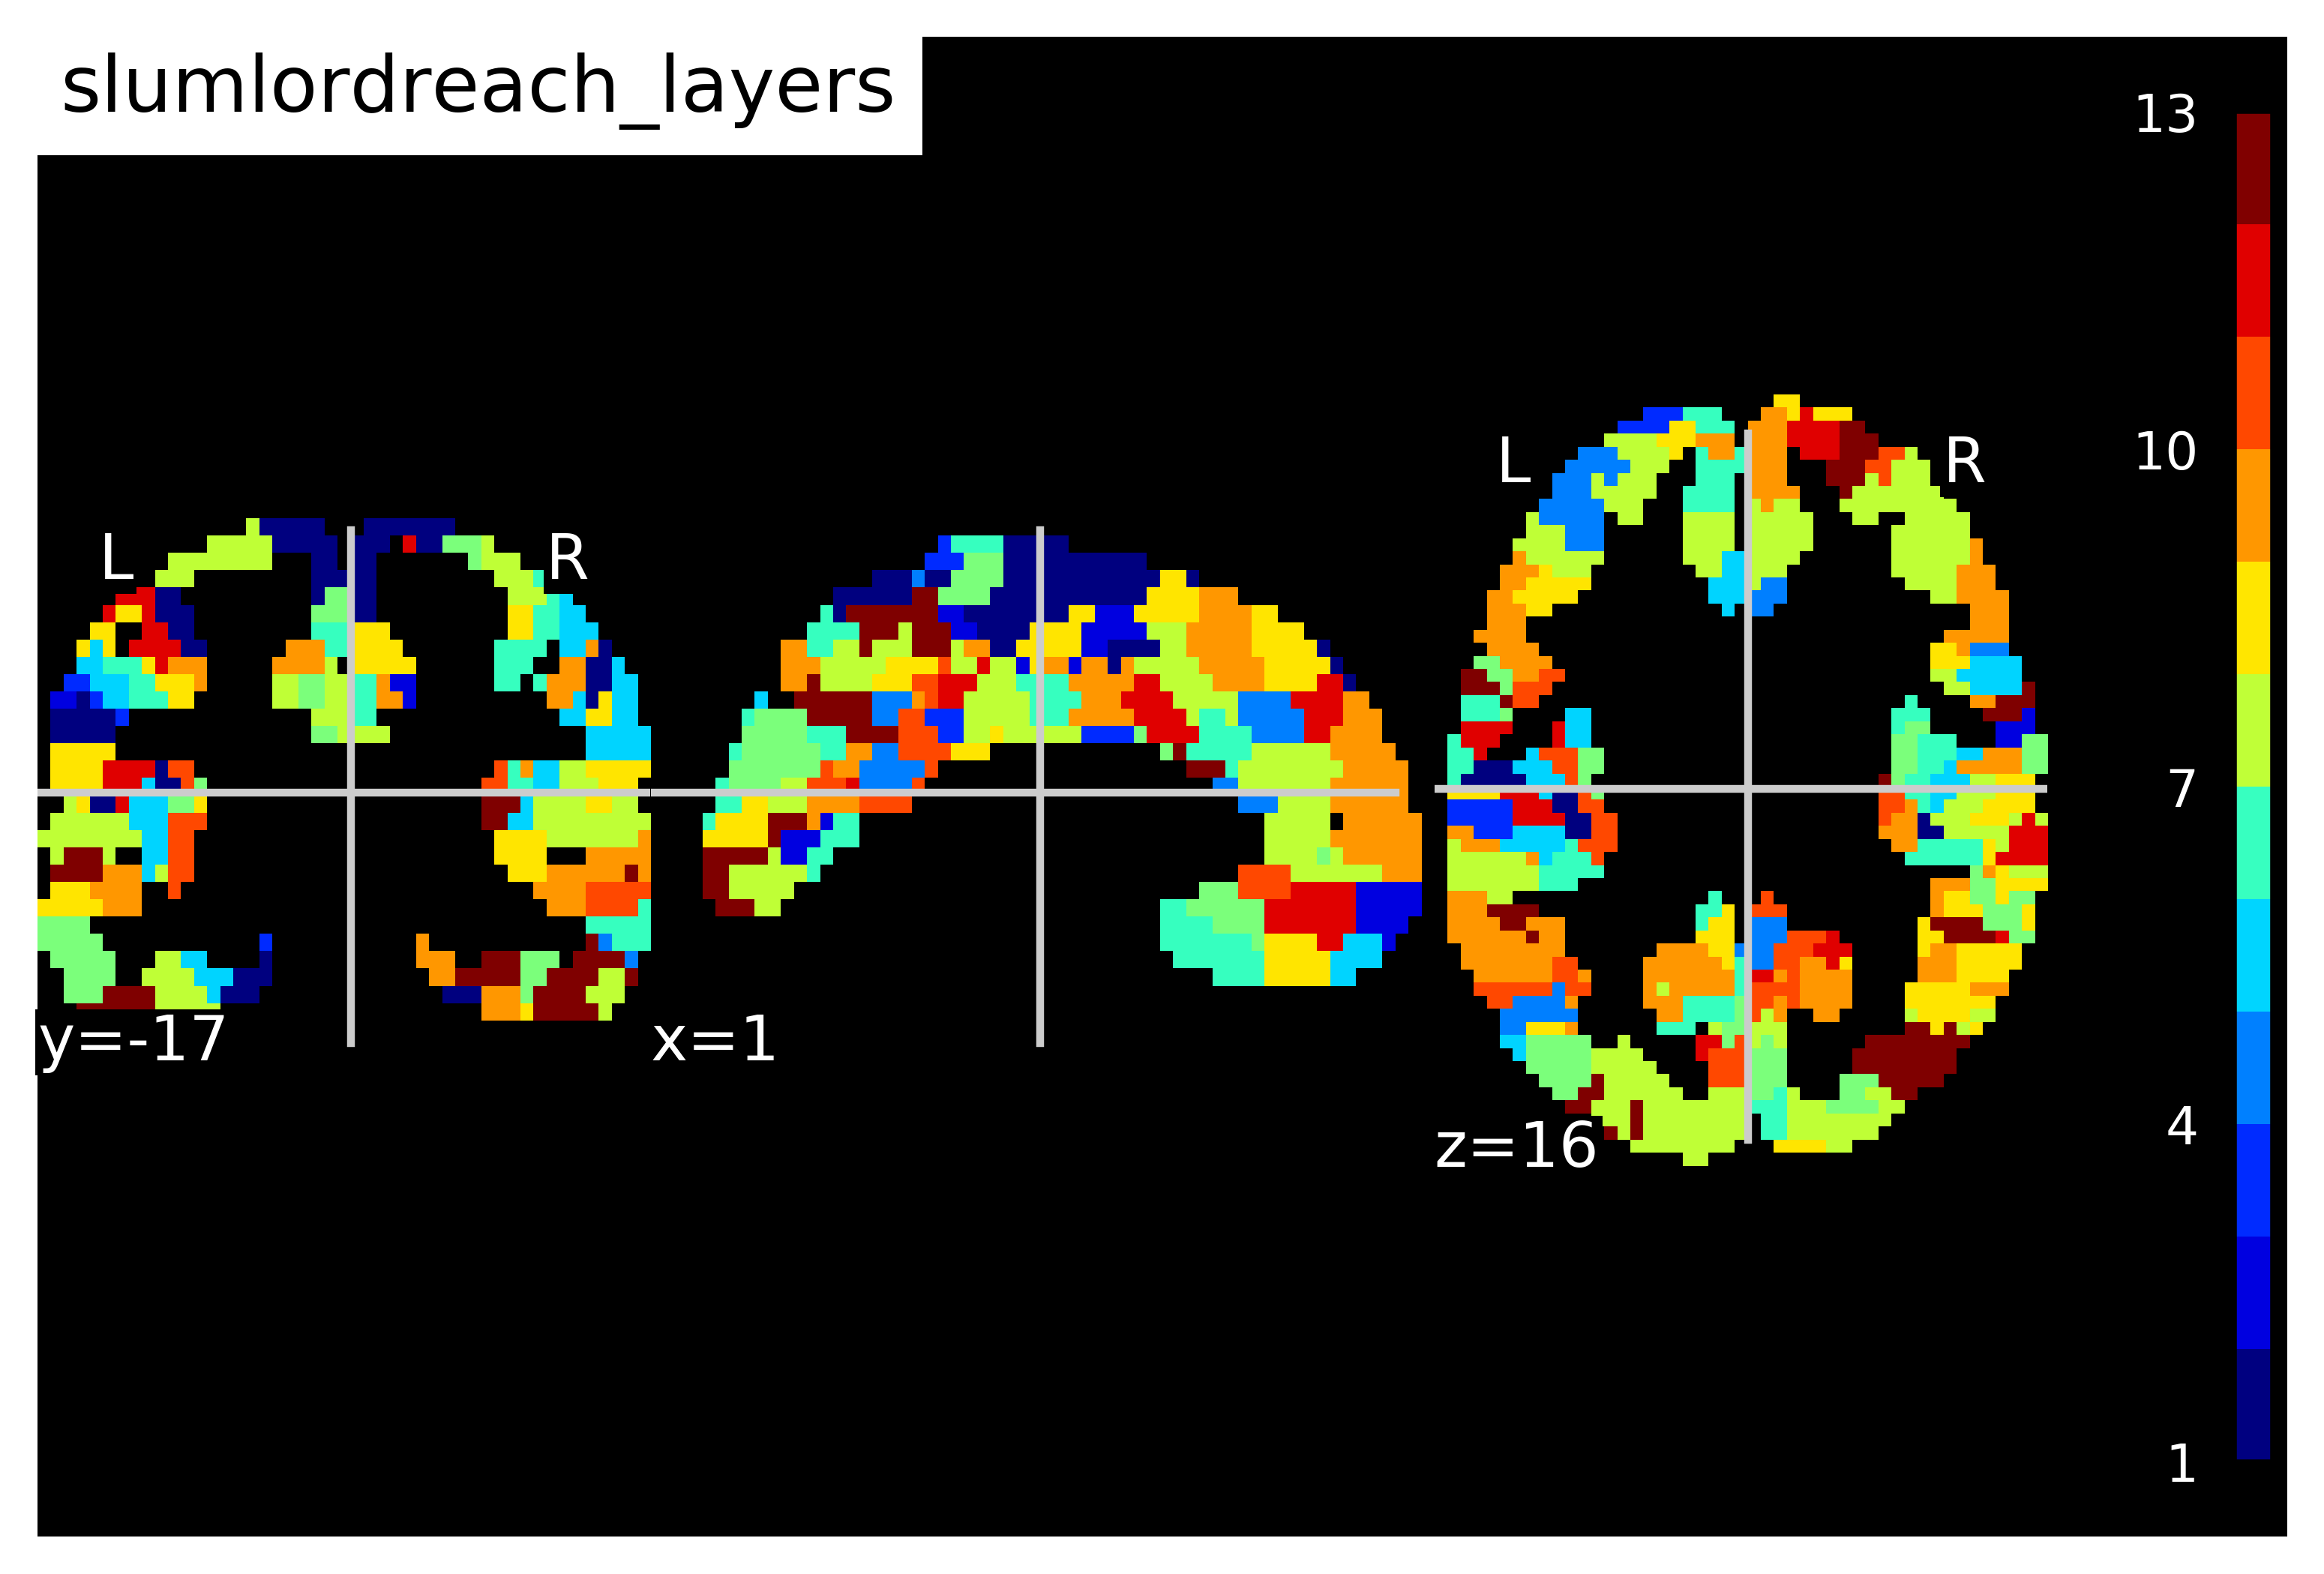

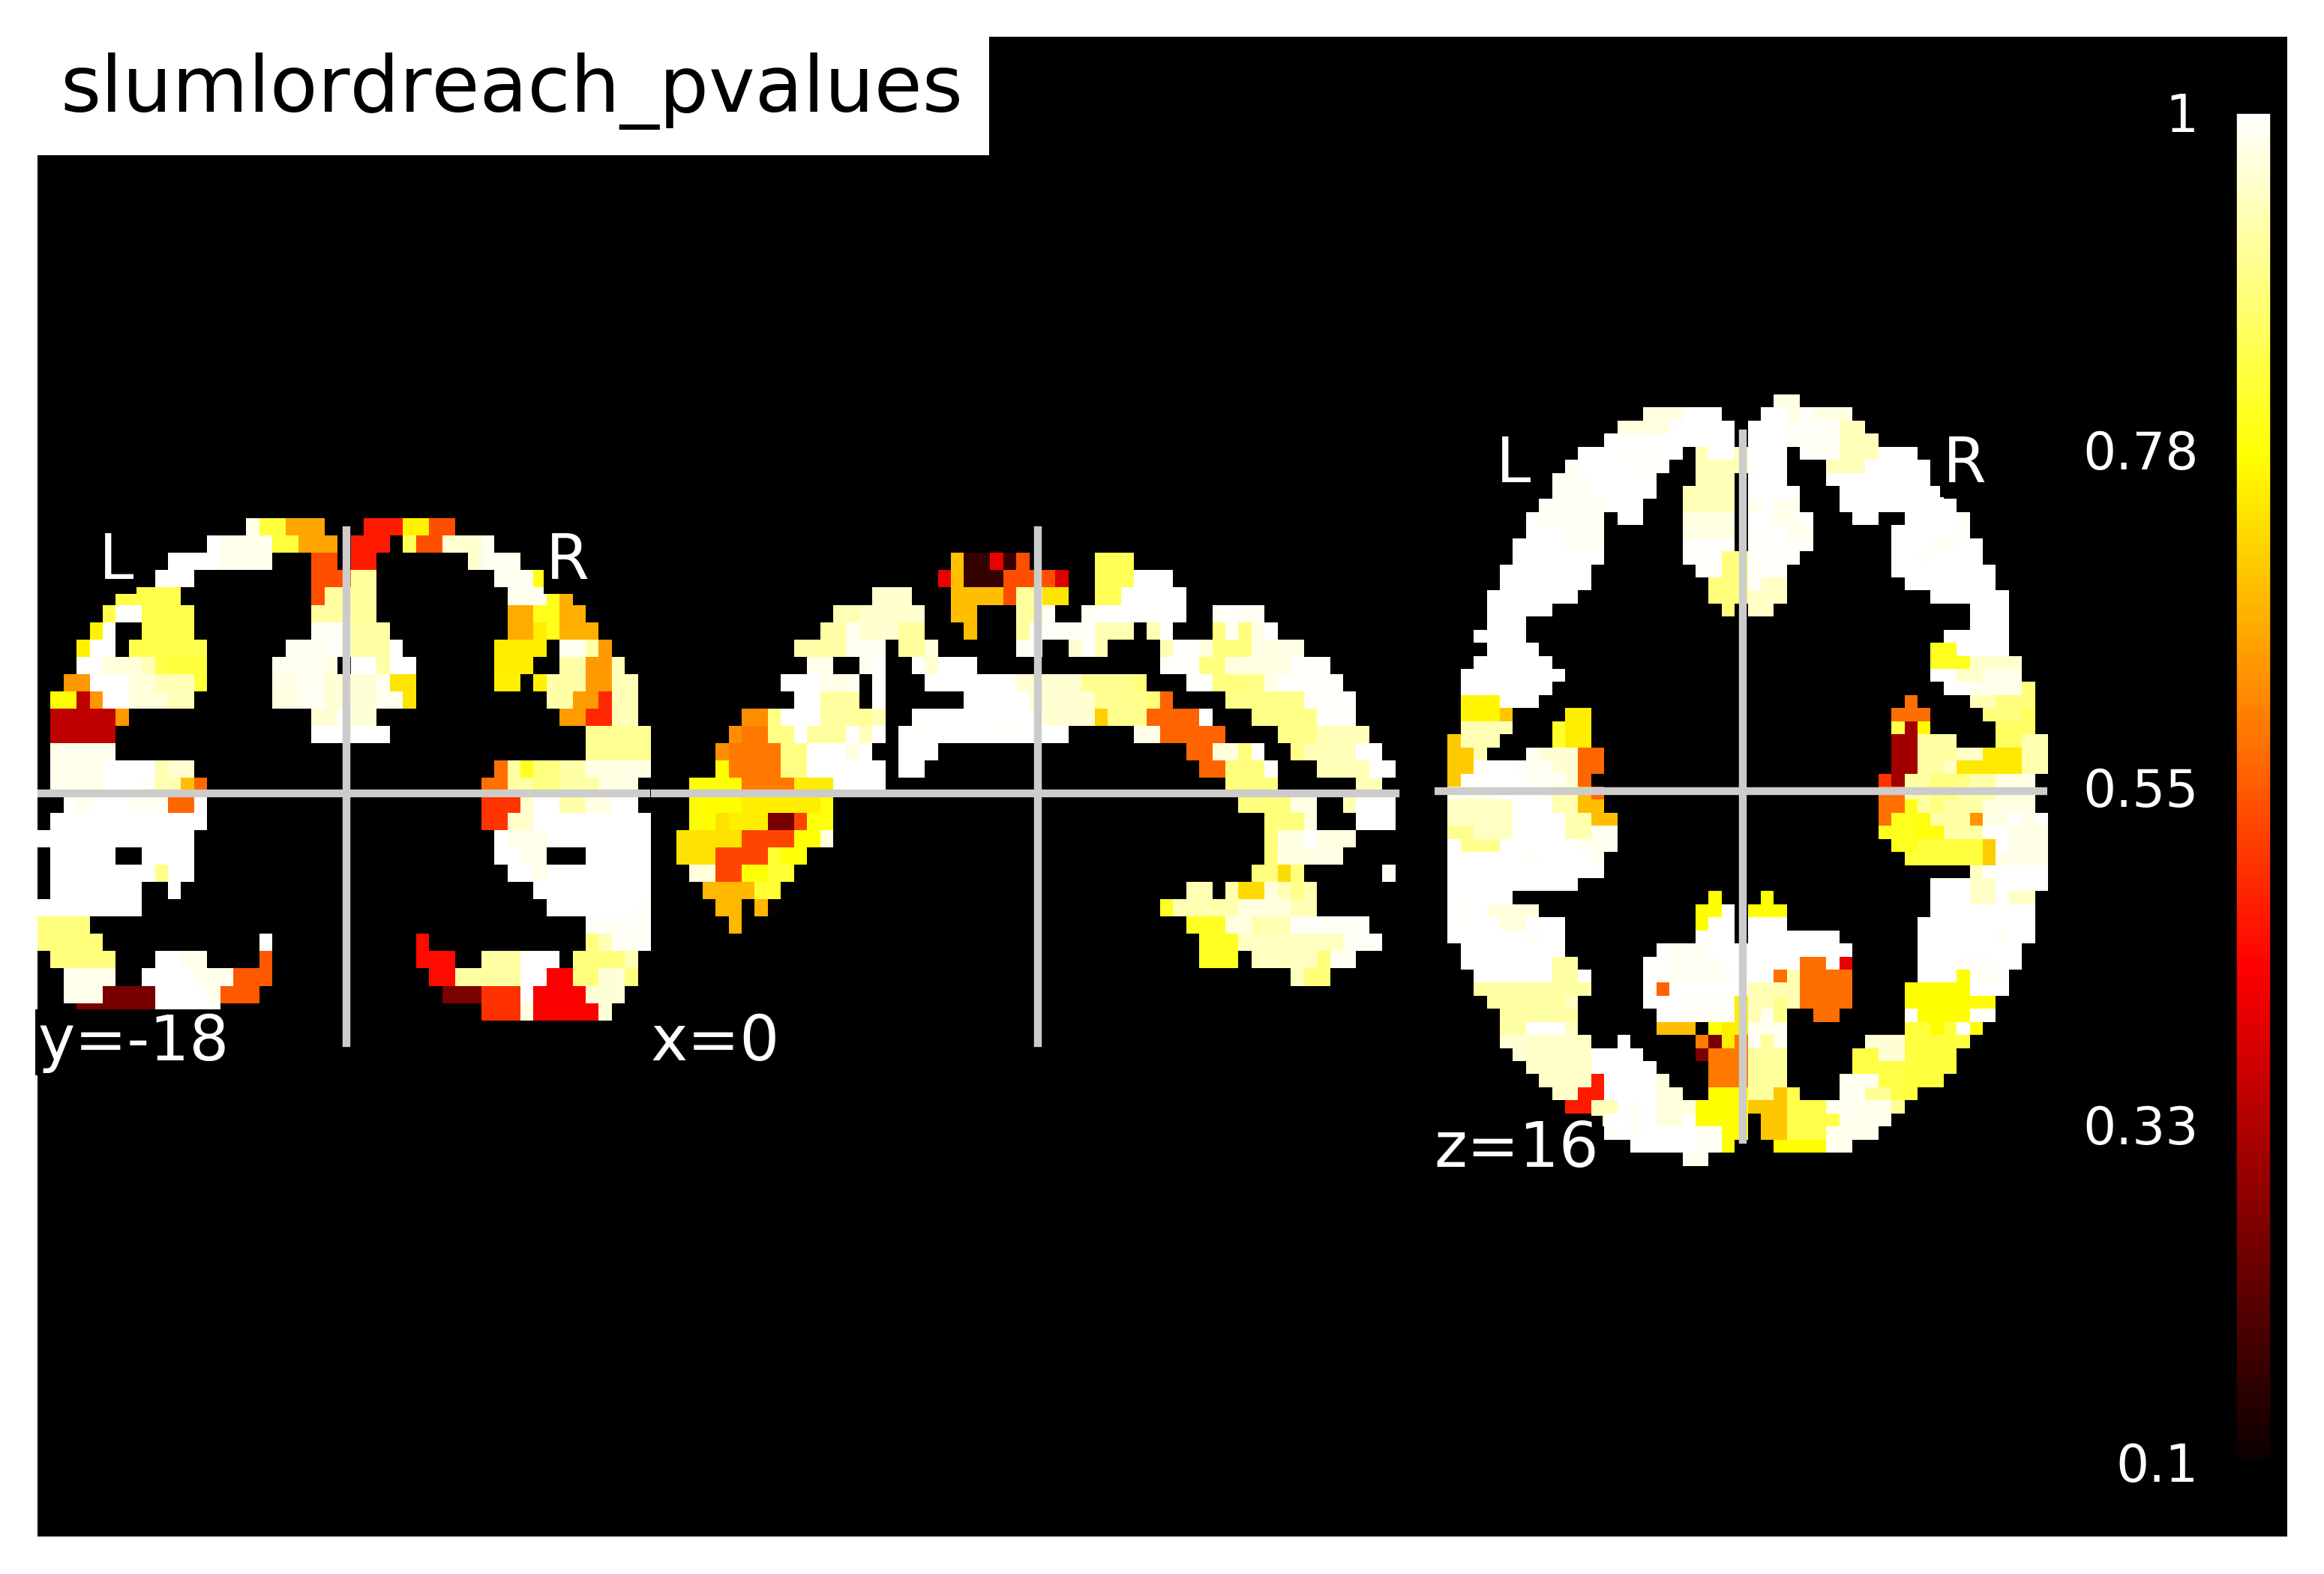

In [26]:
from pylab import *
#Individual slumlordreach Preference Map 
m,p,affine=get_individual_story_preference_map('slumlordreach')
fig=plt.figure(dpi=500)
x=niplt.plot_img(nib.Nifti1Image(m,affine),cmap = cm.get_cmap('jet', 13),figure=fig,colorbar=True,threshold=0.9,vmax=13,black_bg=True,title='slumlordreach_layers')
fig=plt.figure(dpi=500)
x=niplt.plot_img(nib.Nifti1Image(p,affine),figure=fig,colorbar=True,black_bg=True,cut_coords=(0,-18,16),threshold=1e-9,cmap='hot',title='slumlordreach_pvalues')
#cbar=fig.colorbar(x)



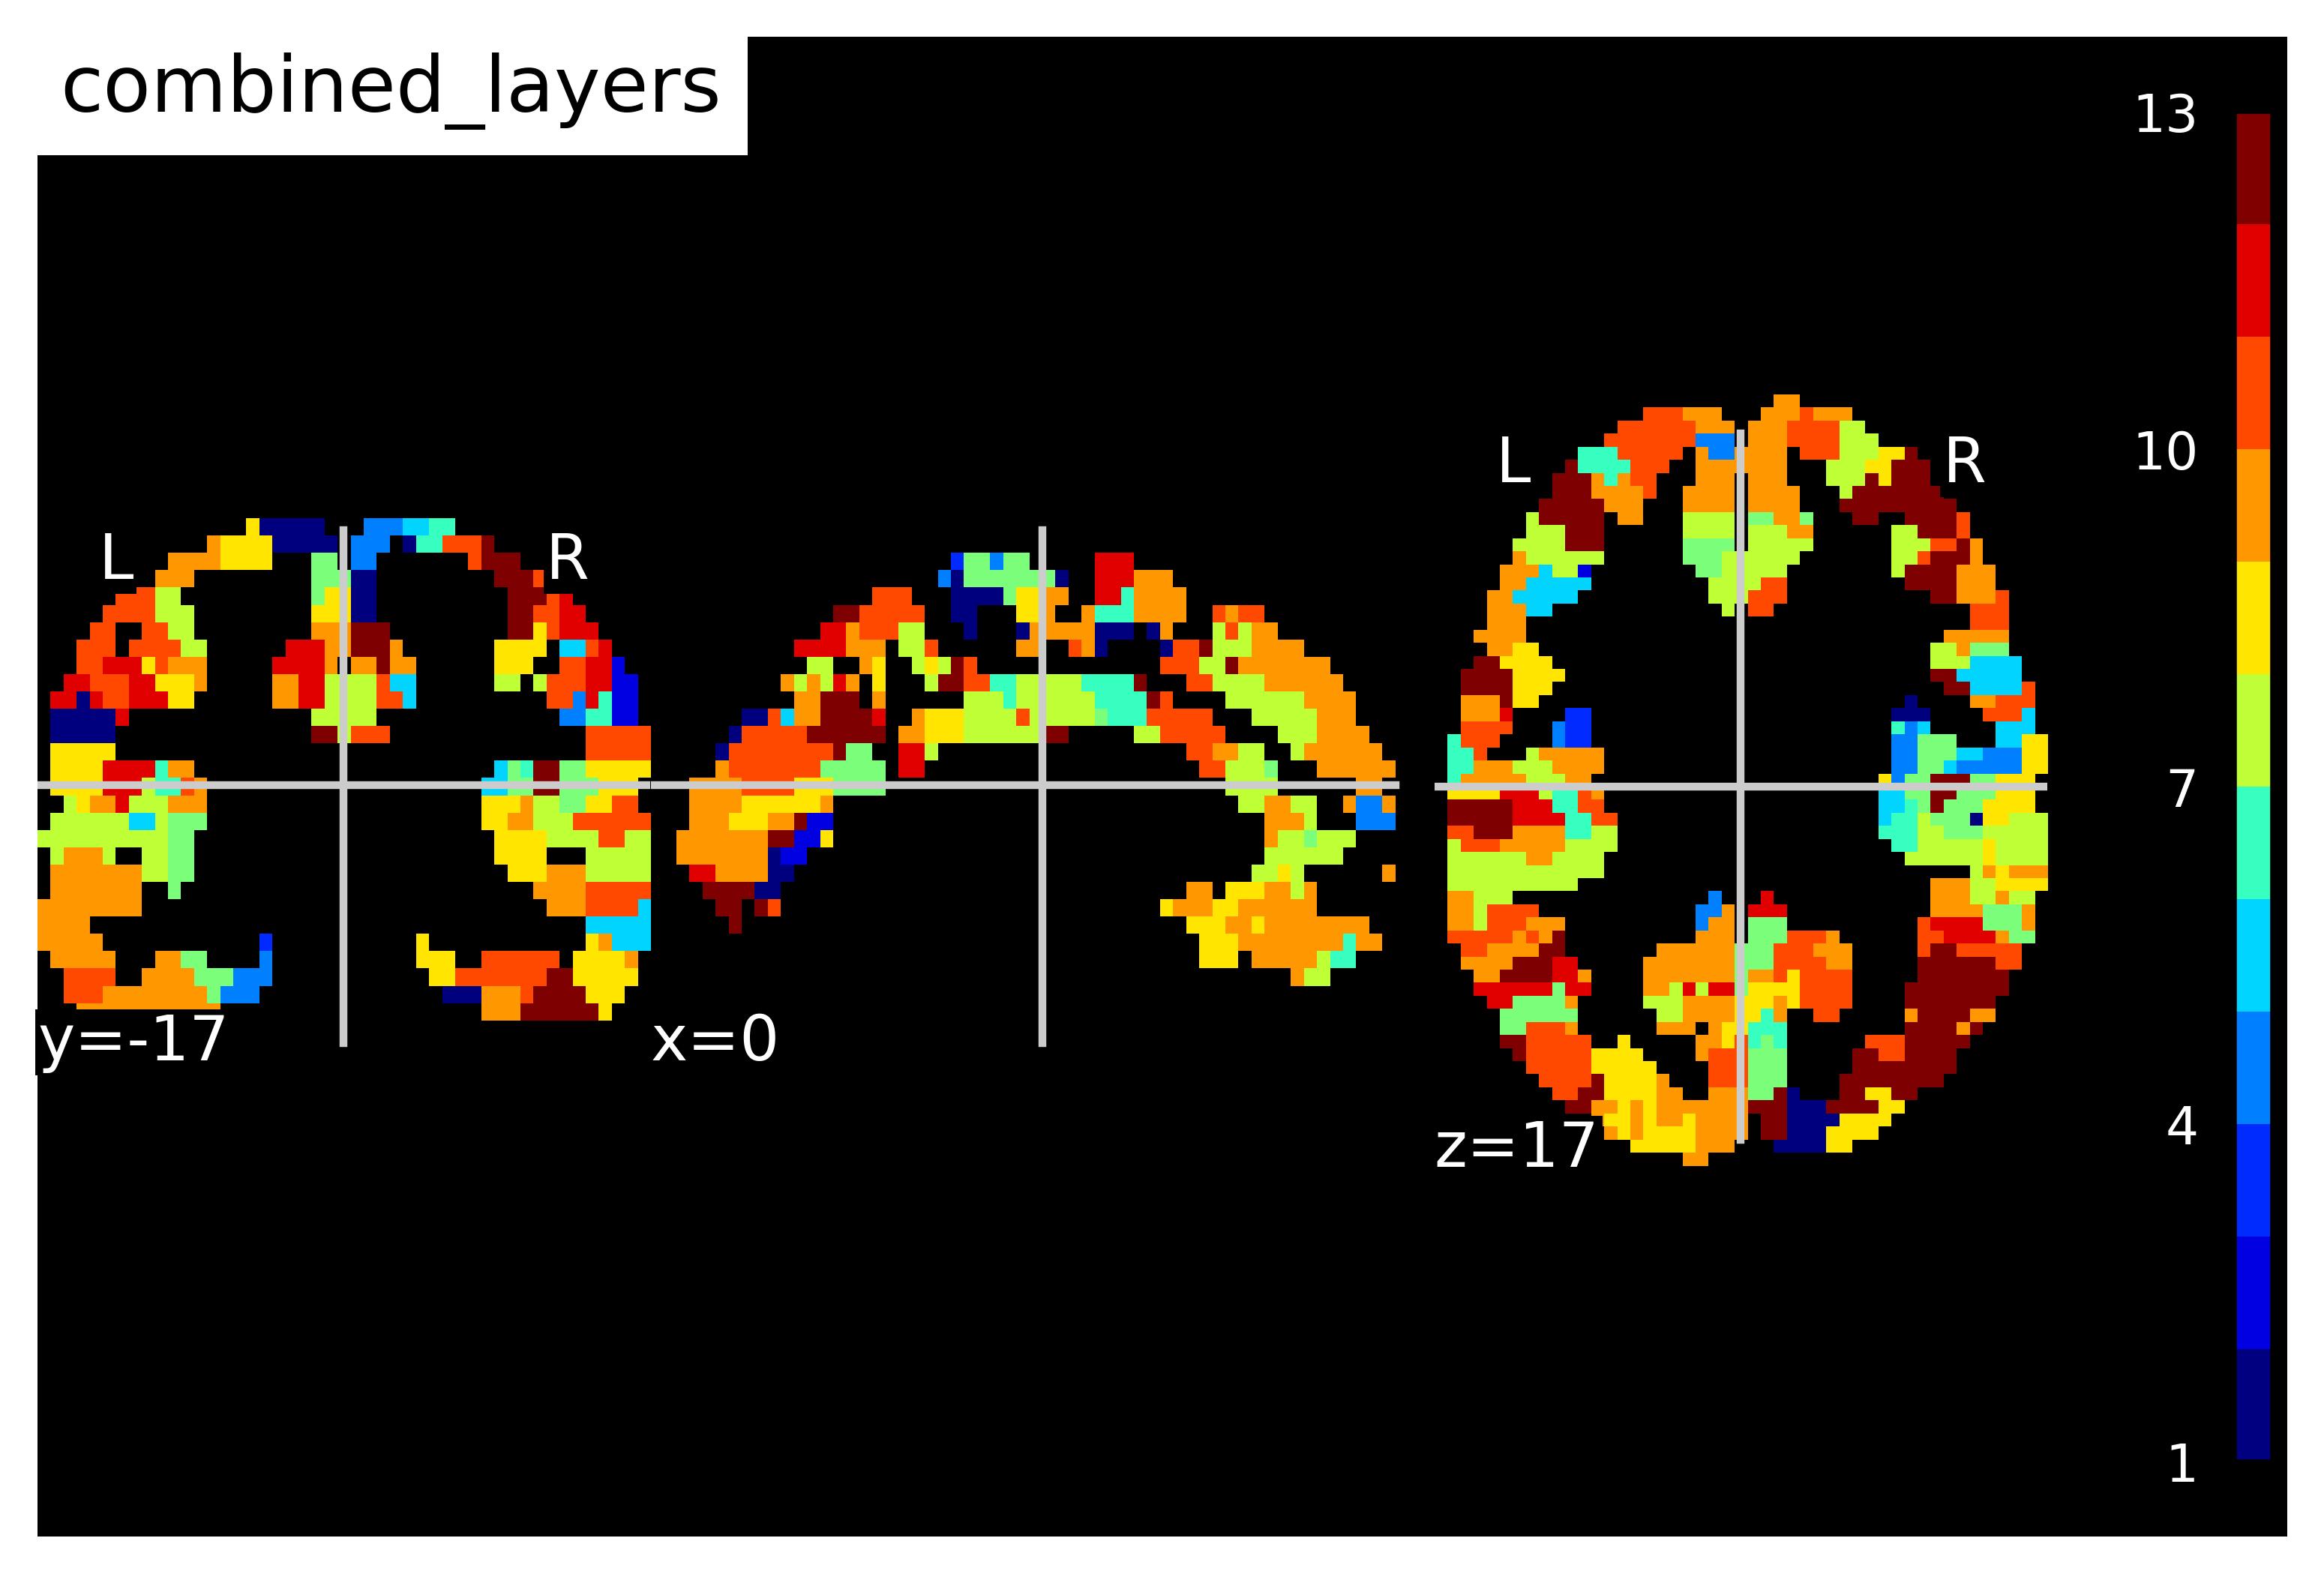

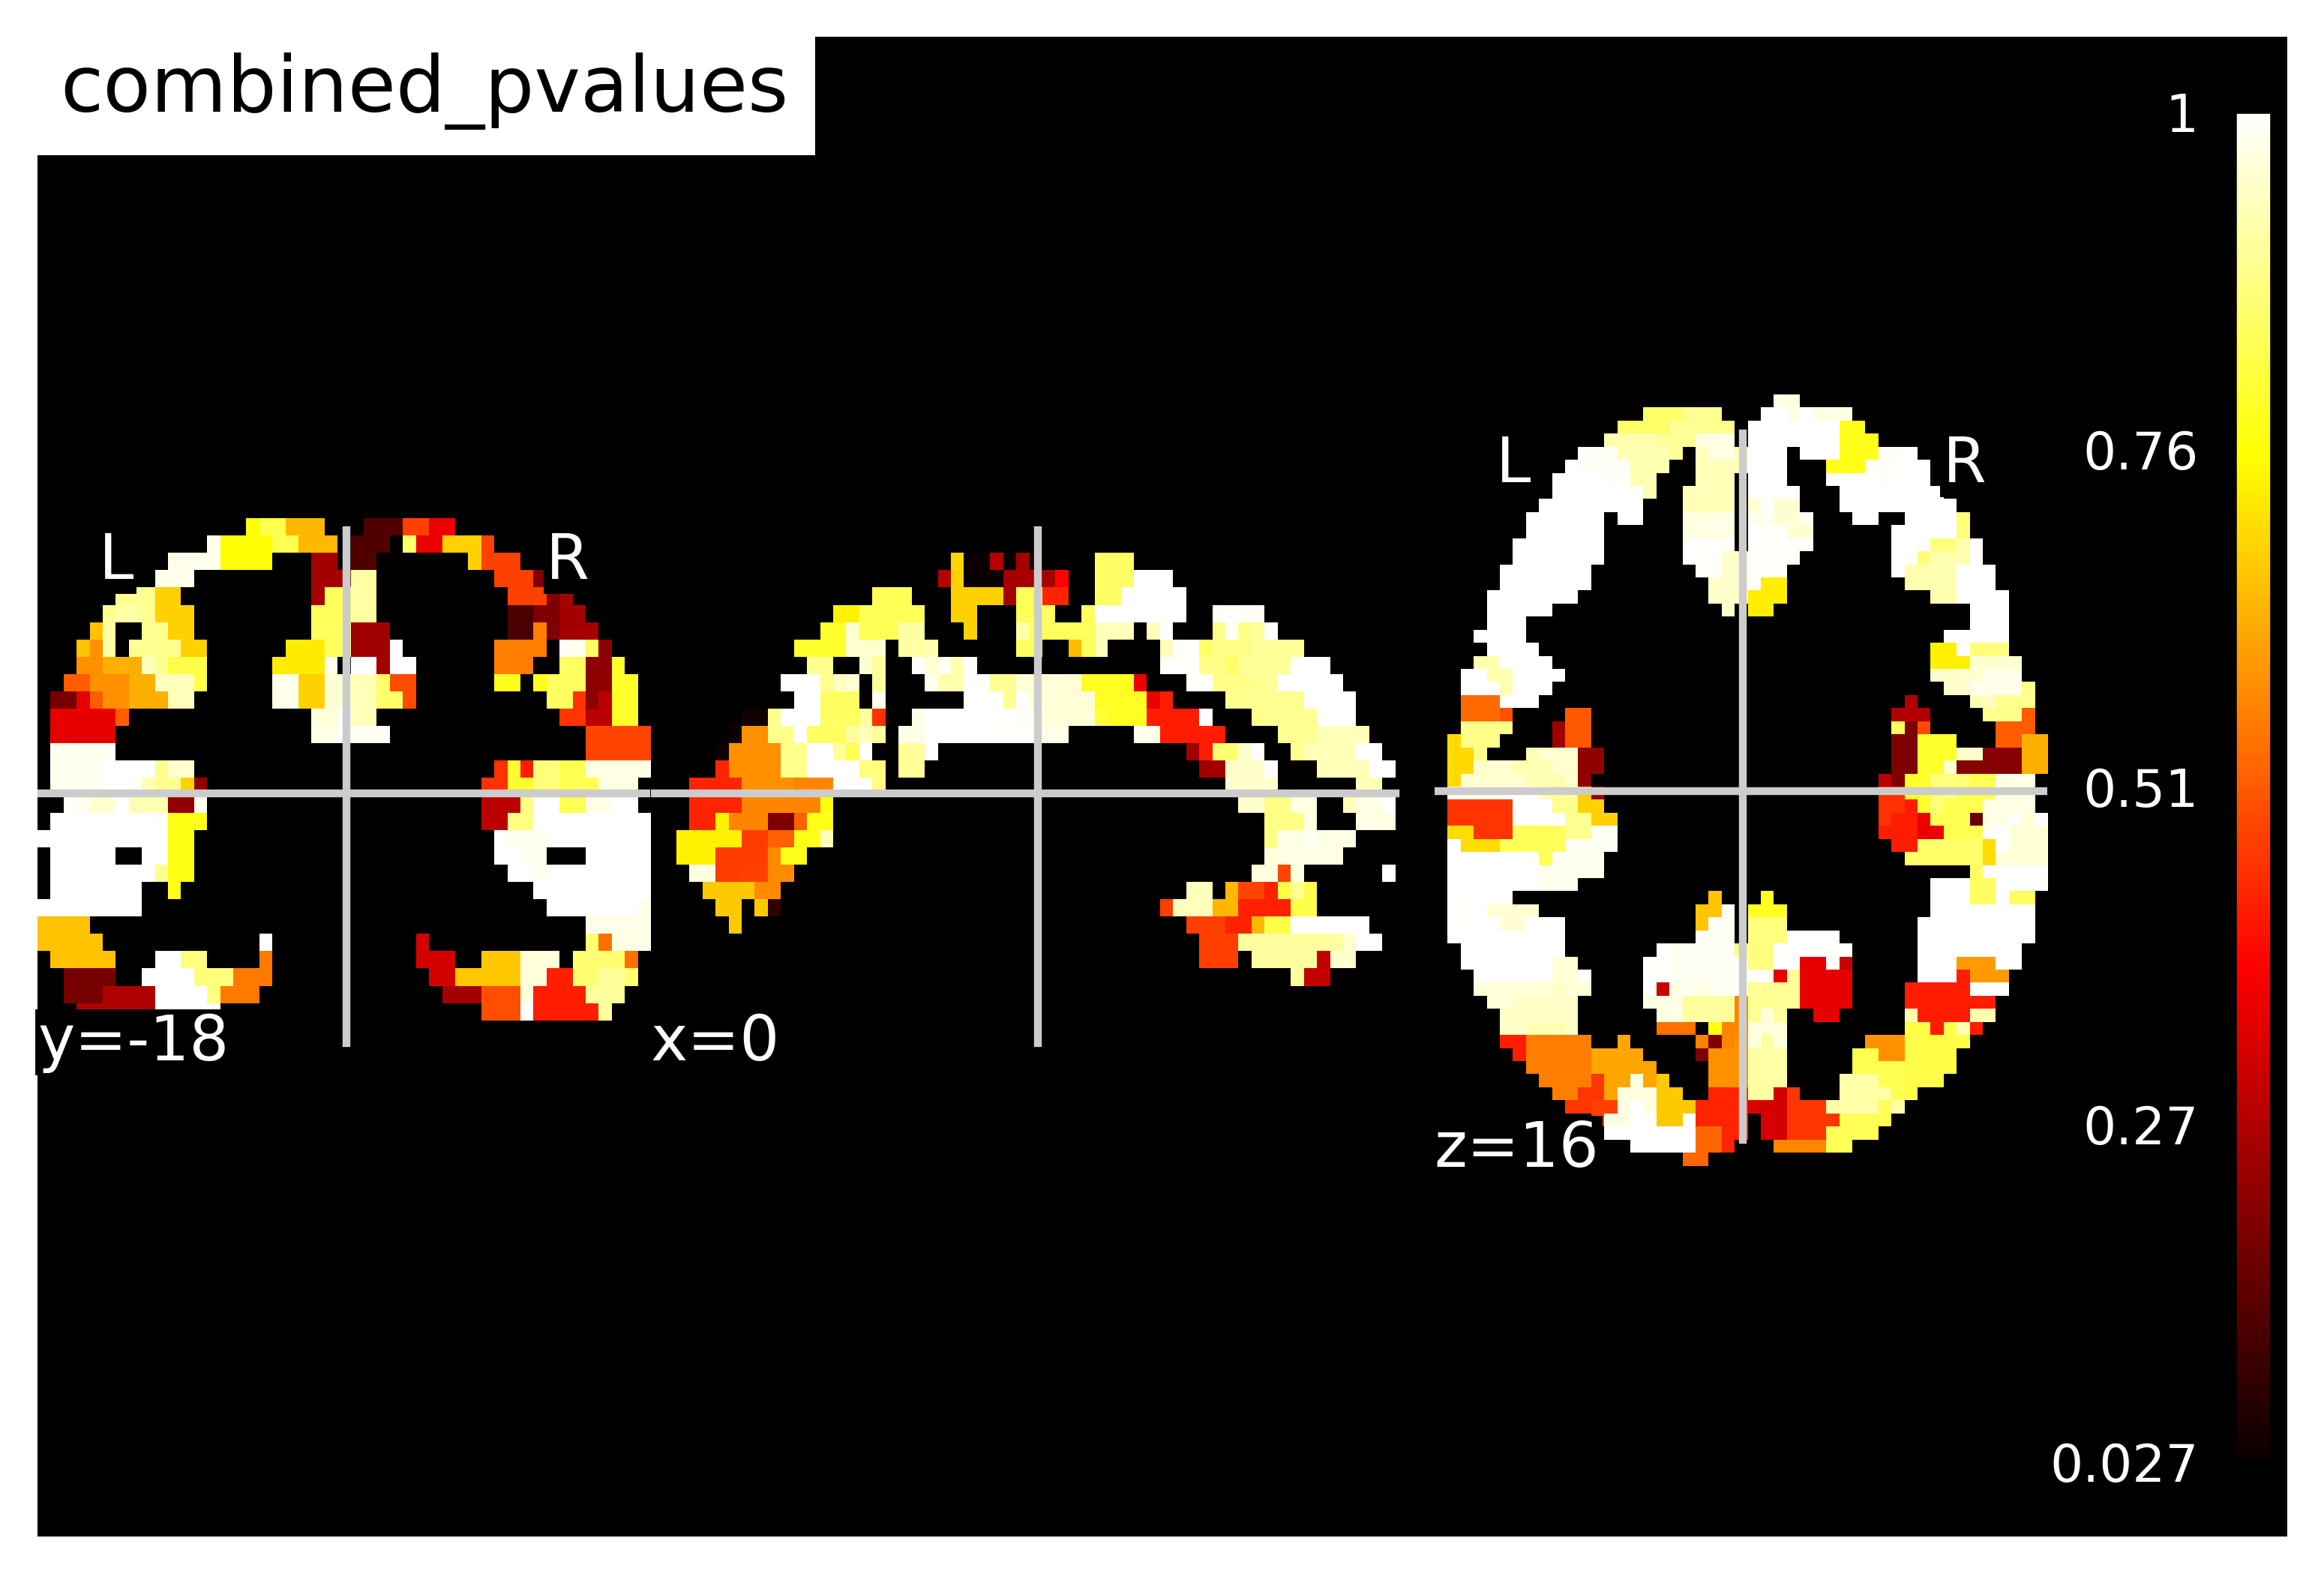

In [35]:
from pylab import *
#Individual Combined Two-story Preference Map 
m,p,affine=get_combined_story_preference_map()
fig=plt.figure(dpi=500)
x=niplt.plot_img(nib.Nifti1Image(m,affine),cmap = cm.get_cmap('jet', 13),figure=fig,colorbar=True,threshold=0.9,vmax=13,black_bg=True,title='combined_layers')
fig=plt.figure(dpi=500)
x=niplt.plot_img(nib.Nifti1Image(p,affine),figure=fig,colorbar=True,black_bg=True,cut_coords=(0,-18,16),threshold=1e-9,cmap='hot',title='combined_pvalues')
#cbar=fig.colorbar(x) 

